# Análisis discriminante lineal (LDA)

**Análisis discriminante lineal (LDA)** es GDA con Gaussianas de **matriz de covarianza común:** $\;\mathbf{\Sigma}_c=\mathbf{\Sigma}$
$$p(y=c\mid\boldsymbol{x};\boldsymbol{\theta})%
\propto p(y=c;\boldsymbol{\theta})\,p(\boldsymbol{x}\mid y=c;\boldsymbol{\theta})%
=\pi_c\,\mathcal{N}_D(\boldsymbol{\mu}_c,\mathbf{\Sigma})$$
Las funciones discriminantes de las clases pueden verse como las de QDA particularizadas al caso $\;\mathbf{\Sigma}_c=\mathbf{\Sigma}$:
$$\begin{align*}
\log p(y=c\mid\boldsymbol{x};\boldsymbol{\theta})%
&=\log\pi_c-\frac{D}{2}\log(2\pi)-\frac{1}{2}\log\vert\mathbf{\Sigma}\vert
-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu}_c)^t\mathbf{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu}_c)\\%
&=\boldsymbol{x}^t\mathbf{A}\boldsymbol{x}+\boldsymbol{\beta}_c^t\boldsymbol{x}+\gamma_c+\kappa\\%
\mathbf{A}&=-\frac{1}{2}\mathbf{\Sigma}^{-1}\\%
\boldsymbol{\beta}_c&=\mathbf{\Sigma}^{-1}\boldsymbol{\mu}_c\\%
\gamma_c&=\log\pi_c-\frac{1}{2}\boldsymbol{\mu}_c^t\mathbf{\Sigma}^{-1}\boldsymbol{\mu}_c\\%
\kappa&=-\frac{D}{2}\log(2\pi)-\frac{1}{2}\log\vert\mathbf{\Sigma}\vert%
\end{align*}$$
Al igual que $\kappa$, el término cuadrático no depende de $c$, por lo que puede ignorarse y las discriminantes resultan lineales con la entrada $\boldsymbol{x}$. Por este motivo hablamos de análisis discriminante lineal en lugar de cuadrático.

**Ejemplo:** $\;C=3$, $\;D=2$, $\;\pi_1=\pi_2=\pi_3=1/3$ (podemos ignorar $\log \pi_c$ en $\gamma_c$)
$$\begin{align*}
\boldsymbol{\mu}_1&=(0, 0)^t & \boldsymbol{\mu}_2&=(0, 4)^t & \boldsymbol{\mu}_3&=(4, 4)^t\\%
\mathbf{\Sigma}&=\begin{pmatrix}1&0\\0&1\end{pmatrix}&%
\mathbf{\Sigma}^{-1}&=\begin{pmatrix}1&0\\0&1\end{pmatrix}&&\\%
\boldsymbol{\beta}_1&=(0, 0)^t & \boldsymbol{\beta}_2&=(0,4)^t & \boldsymbol{\beta}_3&=(4,4)^t\\%
\gamma_1&=0 & \gamma_2&=-8 & \gamma_3&= -16%
\end{align*}$$

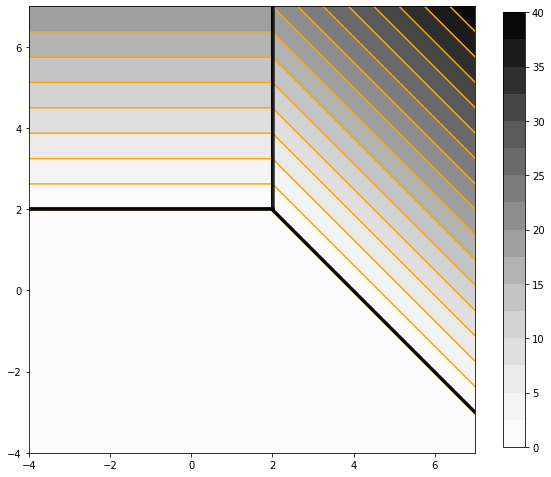

In [1]:
import numpy as np
import matplotlib.pyplot as plt

b1, c1 = np.array([0, 0]), 0
b2, c2 = np.array([0, 4]), -8
b3, c3 = np.array([4, 4]), -16
x1, x2 = np.meshgrid(np.linspace(-4, 7, num=128), np.linspace(-4, 7, num=128))
x = np.c_[np.ravel(x1), np.ravel(x2)]
p1 =  lambda x: b1 @ x + c1
p2 =  lambda x: b2 @ x + c2
p3 =  lambda x: b3 @ x + c3
maxp = lambda x: max(p1(x), p2(x), p3(x))
maxpx = np.apply_along_axis(maxp, 1, x)
amaxp = lambda x: np.argmax([p1(x), p2(x), p3(x)])
amaxpx = np.apply_along_axis(amaxp, 1, x)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set(aspect='equal')
ax.contour(x1, x2, maxpx.reshape(x1.shape), 16, colors='orange', linestyles='solid')
cp = ax.contourf(x1, x2, maxpx.reshape(x1.shape), 16, cmap='Greys')
ax.contour(x1, x2, amaxpx.reshape(x1.shape), colors='black', linestyles='solid', linewidths=1)
plt.colorbar(cp, ax=ax, shrink=0.8);

Los conjuntos de nivel típicos de las Gaussianas pueden obtenerse añadiendo el término cuadrático común a las discriminantes, si bien el mismo es irrelevante a efectos de regiones y fronteras de decisión:

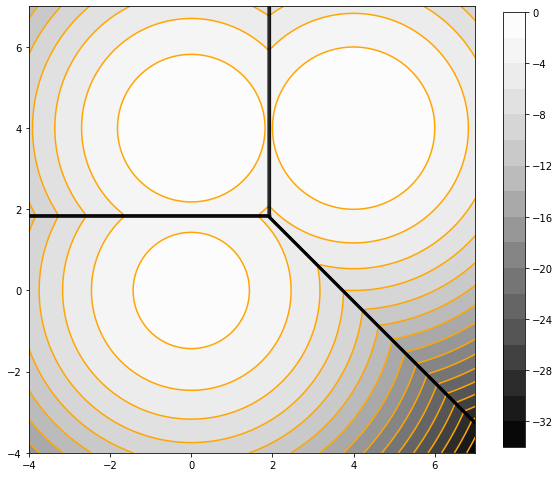

In [2]:
import numpy as np
import matplotlib.pyplot as plt

A1, b1, c1 = np.array([ [-1/2,    0], [   0,  -1/2] ]), np.array([0, 0]), -0.973
A2, b2, c2 = np.array([ [-1/2,    0], [   0,  -1/2] ]), np.array([0, 4]), -8.3466
A3, b3, c3 = np.array([ [-1/2,    0], [   0,  -1/2] ]), np.array([4, 4]), -16
x1, x2 = np.meshgrid(np.linspace(-4, 7, num=128), np.linspace(-4, 7, num=128))
x = np.c_[np.ravel(x1), np.ravel(x2)]
p1 =  lambda x: x.T @ A1 @ x + b1 @ x + c1
p2 =  lambda x: x.T @ A2 @ x + b2 @ x + c2
p3 =  lambda x: x.T @ A3 @ x + b3 @ x + c3
maxp = lambda x: max(p1(x), p2(x), p3(x))
maxpx = np.apply_along_axis(maxp, 1, x)
amaxp = lambda x: np.argmax([p1(x), p2(x), p3(x)])
amaxpx = np.apply_along_axis(amaxp, 1, x)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set(aspect='equal')
ax.contour(x1, x2, maxpx.reshape(x1.shape), 16, colors='orange', linestyles='solid')
cp = ax.contourf(x1, x2, maxpx.reshape(x1.shape), 16, cmap='Greys_r')
ax.contour(x1, x2, amaxpx.reshape(x1.shape), colors='black', linestyles='solid', linewidths=1)
plt.colorbar(cp, ax=ax, shrink=0.8);